# Demo File

Here is a quick demo on how to use the disney_movie_analysis functions on IMDB and Rotten Tomatoes data.

In [1]:
# Packages
import pandas as pd
import numpy as np
import requests
import re
from bs4 import BeautifulSoup
import seaborn as sns
from collections import Counter


# Our Functions
from scrape_data import scrape_imdb, scrape_rotten_tomatoes, get_html_text
from clean_data_functions import clean_imdb, clean_rotten_tomatoes
from analysis_functions import list_averages, year_averages_plot, top_list_vals, merge_imdb_rt

We will use the following webpages, but the functions works for other IMDB and Rotten Tomatoes webpages as well.

https://editorial.rottentomatoes.com/guide/disney-100-essential-movies/
https://www.imdb.com/list/ls089035876/?sort=release_date,desc&st_dt=&mode=detail&page=1 (This list has 5 pages worth of movies, from the code you can see how you could use the function to scrape from multiple IMDB webpages.)

### Scrape Data

In [2]:
# Scrape from Rotten Tomatoes

webpage = "https://editorial.rottentomatoes.com/guide/disney-100-essential-movies/"

rotten_tomatoes = scrape_rotten_tomatoes(webpage)

In [3]:
# Scrape from IMDB

webpages = ["https://www.imdb.com/list/ls089035876/?sort=release_date,desc&st_dt=&mode=detail&page=1", 
            "https://www.imdb.com/list/ls089035876/?sort=release_date,desc&st_dt=&mode=detail&page=2",
            "https://www.imdb.com/list/ls089035876/?sort=release_date,desc&st_dt=&mode=detail&page=3", 
            "https://www.imdb.com/list/ls089035876/?sort=release_date,desc&st_dt=&mode=detail&page=4",
            "https://www.imdb.com/list/ls089035876/?sort=release_date,desc&st_dt=&mode=detail&page=5"]

imdb = pd.DataFrame()
for webpage in webpages:
    imdb = pd.concat([imdb, scrape_imdb(webpage)])

### Clean Data

In [4]:
# Clean Rotten Tomatoes

rotten_tomatoes = clean_rotten_tomatoes(rotten_tomatoes)
rotten_tomatoes.head(5)


,title,year,score,actors,director,comparison_score
0,The Little Mermaid,2023,67%,"[Halle Bailey, Jonah Hauer-King, Javier Bard...",[Rob Marshall],6.7
1,Turning Red,2022,95%,"[Rosalie Chiang, Sandra Oh, Ava Morse, Hyei...",[Domee Shi],9.5
2,Raya and the Last Dragon,2021,93%,"[Kelly Marie Tran, Awkwafina, Izaac Wang, G...","[Don Hall, Carlos López Estrada]",9.3
3,Encanto,2021,91%,"[Stephanie Beatriz, María Cecilia Botero, Di...","[Jared Bush, Byron Howard]",9.1
4,Onward,2020,88%,"[Tom Holland, Chris Pratt, Julia Louis-Dreyf...",[Dan Scanlon],8.8


In [5]:
# Clean IMDB

imdb = clean_imdb(imdb)
imdb.head(5)

,title,year,score,runtime,rating,genre,gross,director,actors,decade
0,Jungle Cruise,2021,6.6,127.0,PG-13,"[Action, Adventure, Comedy]",207570,[Jaume Collet-Serra],"[Dwayne Johnson, Emily Blunt, Edgar Ramírez, J...",2020
1,Black Widow,2021,6.7,134.0,PG-13,"[Action, Adventure, Sci-Fi]",414621,[Cate Shortland],"[Scarlett Johansson, Florence Pugh, David Harb...",2020
2,Raya and the Last Dragon,2021,7.3,107.0,PG,"[Animation, Action, Adventure]",166796,"[Don Hall, Carlos López Estrada, Paul Briggs, ...","[Kelly Marie Tran, Awkwafina, Gemma Chan, Izaa...",2020
3,Soul,2020,8.0,100.0,PG,"[Animation, Adventure, Comedy]",364621,"[Pete Docter, Kemp Powers]","[Jamie Foxx, Tina Fey, Graham Norton, Rachel H...",2020
4,Artemis Fowl,2020,4.3,95.0,PG,"[Adventure, Family, Fantasy]",30092,[Kenneth Branagh],"[Ferdia Shaw, Lara McDonnell, Josh Gad, Tamara...",2020


We have also provided a function allowing you to merge any Rotten Tomatoes and IMDB dataframes.

In [11]:
merge_imdb_rt(imdb, rotten_tomatoes).head(5)

,title,year,score_x,rotten_tomatoes_score,imdb_score,runtime,rating,genre,gross,director,actors,decade
0,Raya and the Last Dragon,2021,93%,9.3,7.3,107.0,PG,"[Animation, Action, Adventure]",166796,"[Don Hall, Carlos López Estrada, Paul Briggs, ...","[Kelly Marie Tran, Awkwafina, Gemma Chan, Izaa...",2020
1,Onward,2020,88%,8.8,7.4,102.0,PG,"[Animation, Action, Adventure]",165122,[Dan Scanlon],"[Tom Holland, Chris Pratt, Julia Louis-Dreyfus...",2020
2,Soul,2020,95%,9.5,8.0,100.0,PG,"[Animation, Adventure, Comedy]",364621,"[Pete Docter, Kemp Powers]","[Jamie Foxx, Tina Fey, Graham Norton, Rachel H...",2020
3,Aladdin,2019,57%,5.7,6.9,128.0,PG,"[Adventure, Comedy, Family]",284755,[Guy Ritchie],"[Will Smith, Mena Massoud, Naomi Scott, Marwan...",2010
4,The Lion King,2019,52%,5.2,6.8,118.0,PG,"[Animation, Adventure, Drama]",261999,[Jon Favreau],"[Donald Glover, Beyoncé, Seth Rogen, Chiwetel ...",2010


### Analysis Help Functions

We also have a few functions to help with the analysis of our data that we will demonstrate below.

In [8]:
# Find the average score of a column over the values in a list column

list_averages(imdb, 'genre', 'score').head(5)

,0,1
0,Action,6.4198
1,Adventure,6.4524
2,Comedy,6.1707
3,Sci-Fi,6.4538
4,Animation,6.8572


In [9]:
# Find the count of each value in a list column and return the top n

top_list_vals(imdb['genre'], 5)

,0,1
0,Adventure,296
1,Comedy,290
2,Family,276
3,Animation,145
4,Drama,139


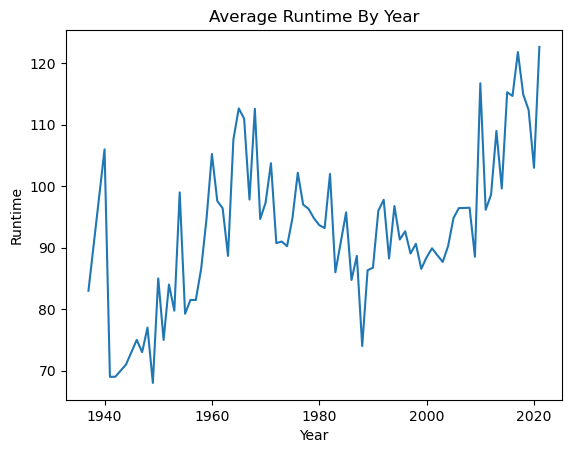

In [14]:
# Plot the average of a variable over time

year_averages_plot(imdb, 'year', 'runtime')